In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st 
import plotly.express as px

In [108]:
students = pd.read_csv('StudentsPerformance.csv')

In [109]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [110]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 1. Find the number of female and male students

In [111]:
students['gender'].value_counts() 

female    518
male      482
Name: gender, dtype: int64

# 2.What do you think about the student's parental level of education?

In [112]:
average_score = students[['math score', 'reading score', 'writing score']].mean(axis=1)
students.insert(8, 'average score', np.round(average_score, 2))
students.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group C,some high school,free/reduced,none,0,17,10,9.00
1,female,group B,high school,free/reduced,none,8,24,23,18.33
2,female,group B,some high school,free/reduced,none,18,32,28,26.00
3,female,group B,some college,standard,none,11,38,32,27.00
4,female,group C,some college,free/reduced,none,22,39,33,31.33
5,female,group B,high school,free/reduced,completed,23,44,36,34.33
6,female,group B,some high school,free/reduced,none,24,38,27,29.67
7,female,group D,associate's degree,free/reduced,none,26,31,38,31.67
8,female,group D,some high school,free/reduced,none,19,34,32,28.33
9,female,group C,high school,standard,none,29,29,30,29.33


In [8]:
print(students['parental level of education'].unique())

st.mode(students['parental level of education'])

['some high school' 'high school' 'some college' "associate's degree"
 "bachelor's degree" "master's degree"]


'some college'

<AxesSubplot:ylabel='None'>

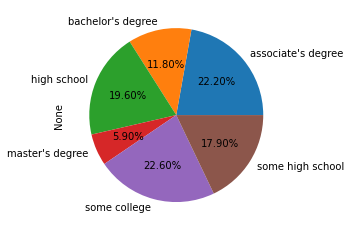

In [31]:
students.groupby('parental level of education').size().plot(kind='pie', autopct='%.2f%%')

In [123]:
parents = students['parental level of education'].unique()
sample_data = []
for parent in parents:
    member = students[students['parental level of education'] == parent].sample(n=30, random_state=1)
    sample_data.append(member)
    parent_data = pd.concat(sample_data, axis=0)
fig = px.scatter(parent_data, x='math score', y='writing score',color='parental level of education',
size='average score',title=' The influence of parental education on student performance ',template='plotly_dark')
fig.show()

Inference  <br> 
1. Most of the parents have attended 'Some College'. 22.60% as shown the chart below, closely followed by <br> associate's degree
2. The average score of the students and parental level of education has a positive correlation. <br>
   More educated they are, more they score. 

# 3. Who scores the most on average for math,reading and writing based on 
● Gender 
● Test preparation course

In [39]:
students.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


Females score higher for reading and writing while Male students scores most for maths on average. 

<AxesSubplot:xlabel='gender'>

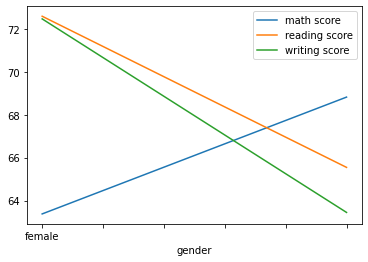

In [75]:
students.groupby('gender').mean().plot()

In [51]:
students.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


<AxesSubplot:xlabel='test preparation course'>

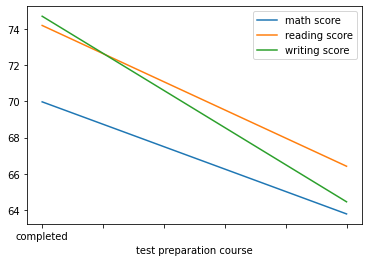

In [86]:
students.groupby('test preparation course').mean().plot()

Students who completed the test preparation course has higher scores on all levels on average

# 4. What do you think about the scoring variation for math, reading and writing based on
● Gender
● Test preparation course

In [140]:
students.groupby('gender').describe()

math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.376448  16.029928   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.821577  14.556411  27.0  59.0  69.0  79.0  100.0   

       reading score             ... writing score        average score  \
               count       mean  ...           75%    max         count   
gender                           ...                                      
female         518.0  72.590734  ...          82.0  100.0         518.0   
male           482.0  65.545643  ...          74.0  100.0         482.0   

                                                                 
             mean        std   min    25%     50%    75%    max  
gender                                                           
female  69.478108  14.703509   9.0  60.67  70.330  78.67  100.0  
male    65.937573  13.868294  23.0  56.00  66.835  76.33  100.0  

[2 rows x 32 columns]

In [99]:
students.groupby('gender').var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


<AxesSubplot:xlabel='gender'>

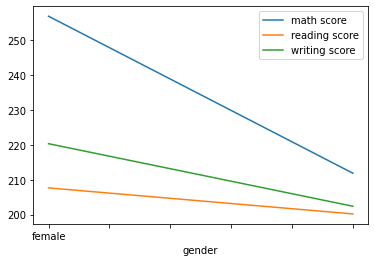

In [87]:
students.groupby('gender').var().plot()

<AxesSubplot:xlabel='gender', ylabel='math score'>

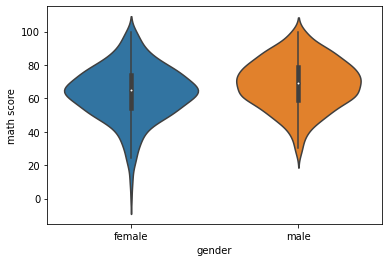

In [102]:
sns.violinplot(x='gender',y='math score',data=students)

Inference: <br>
Male students are have less variance, i.e. more consistency in all the three scores than Female students.<br>
Female students have high variance in math score when compared to male students.<br>
From the summary statistics, we know that the female math score range is 100, while male is 73. 

In [89]:
students.groupby('test preparation course').var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


<AxesSubplot:xlabel='test preparation course'>

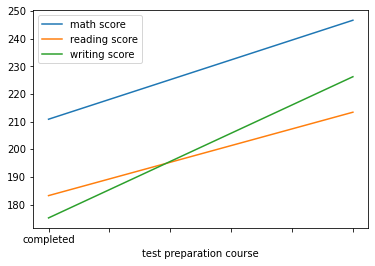

In [90]:
students.groupby('test preparation course').var().plot()

Inference: <br>
More the students complete test preparation course, less is the variance in Maths,reading and writing scores when compared to students who donot complete the course. <br>
As students complete the course, they can perform with more consistency.  <br>
Test prep course seems to be the most effective for maintaining consistency in writing scores.


# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [54]:
students.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [157]:
top25 = students[students['math score']>=students['math score'].quantile(q=0.75)]
top25.sort_values(by = 'math score',ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.00
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.67
997,male,group D,some college,standard,completed,100,97,99,98.67
996,male,group A,some college,standard,completed,100,96,86,94.00
517,female,group E,associate's degree,standard,none,100,100,100,100.00
...,...,...,...,...,...,...,...,...,...
854,male,group D,some high school,standard,completed,77,68,69,71.33
855,male,group E,associate's degree,free/reduced,completed,77,69,68,71.33
856,male,group E,some high school,standard,completed,77,76,77,76.67
415,female,group B,master's degree,free/reduced,completed,77,97,94,89.33
